In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import numpy as np
import os
import time

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [8]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')
test_images = (test_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [13]:
def make_encoder_model():
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(6, 5, padding="SAME",
                                input_shape=[28, 28, 1]))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU())
  model.add(keras.layers.MaxPooling2D(2))

  model.add(keras.layers.Conv2D(16, 3, padding="SAME",
                                input_shape=[14, 14, 1]))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU())
  model.add(keras.layers.MaxPooling2D(2))

  model.add(keras.layers.Conv2D(32, 3, padding="SAME",
                                input_shape=[7, 7, 1]))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU())

  model.add(keras.layers.GlobalAveragePooling2D())
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(10))

  return model

In [14]:
def make_decoder_model():
  model = keras.Sequential()
  model.add(keras.layers.Dense(7*7*256, use_bias=False, input_shape=(10,)))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU())

  model.add(layers.Reshape((7, 7, 256)))
  assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

  model.add(keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  assert model.output_shape == (None, 7, 7, 128)
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU())

  model.add(keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  assert model.output_shape == (None, 14, 14, 64)
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU())

  model.add(keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
  assert model.output_shape == (None, 28, 28, 1)

  return model

In [ ]:
encoder = make_encoder_model()
decoder = make_decoder_model()
model = keras.Sequential([encoder, decoder])

In [17]:
def make_encoder_decoder_model():
  # encoder
  model = tf.keras.Sequential()
  model.add(keras.layers.Conv2D(6, 5, padding="SAME",
                                input_shape=[28, 28, 1]))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU())
  model.add(keras.layers.MaxPooling2D(2))

  model.add(keras.layers.Conv2D(16, 3, padding="SAME",
                                input_shape=[14, 14, 1]))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU())
  model.add(keras.layers.MaxPooling2D(2))

  model.add(keras.layers.Conv2D(32, 3, padding="SAME",
                                input_shape=[7, 7, 1]))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU())

  model.add(keras.layers.GlobalAveragePooling2D())
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(10))
  
  
  
  
  # decoder
  model.add(keras.layers.Dense(7*7*256))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU())

  model.add(keras.layers.Reshape((7, 7, 256)))
  assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

  model.add(keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  assert model.output_shape == (None, 7, 7, 128)
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU())

  model.add(keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  assert model.output_shape == (None, 14, 14, 64)
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU())

  model.add(keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
  assert model.output_shape == (None, 28, 28, 1)
  
  return model

In [18]:
model = make_encoder_decoder_model()

In [20]:
model.compile(optimizer='nadam',
              loss='mean_squared_error')

In [ ]:
model.fit(train_images, train_images, epochs=10, validation_data=(test_images, test_images))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 610s 10ms/sample - loss: 0.1083 - val_loss: 0.1251
Epoch 2/10
60000/60000 [==============================] - 661s 11ms/sample - loss: 0.0886 - val_loss: 0.1354
Epoch 3/10
60000/60000 [==============================] - 672s 11ms/sample - loss: 0.0820 - val_loss: 0.1122
Epoch 4/10
60000/60000 [==============================] - 683s 11ms/sample - loss: 0.0788 - val_loss: 0.0947
Epoch 5/10
60000/60000 [==============================] - 654s 11ms/sample - loss: 0.0758 - val_loss: 0.0889
Epoch 6/10
60000/60000 [==============================] - 632s 11ms/sample - loss: 0.0741 - val_loss: 0.1332
Epoch 7/10
59104/60000 [============================>.] - ETA: 11s - loss: 0.0724

In [56]:
recovered_image = model.predict(test_images[:10])

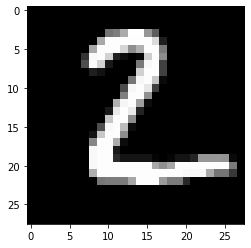

In [57]:
plt.imshow(test_images[1, :, :, 0], cmap='gray')

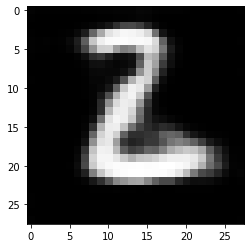

In [58]:
plt.imshow(recovered_image[1, :, :, 0], cmap='gray')

In [38]:
inputs = model.input
outputs = model.get_layer('dense_2').output
encoder_only = keras.models.Model(inputs=inputs, outputs=outputs)

In [54]:
num_of_layers = len(encoder_only.layers)
for i in range(num_of_layers-1):
  print('copy weights from {} to {}'.format(model.layers[i].name, encoder_only.layers[i+1].name))
  encoder_only.layers[i+1].set_weights(model.layers[i].get_weights())

copy weights from conv2d_3 to conv2d_3
copy weights from batch_normalization_4 to batch_normalization_4
copy weights from leaky_re_lu_4 to leaky_re_lu_4
copy weights from max_pooling2d_2 to max_pooling2d_2
copy weights from conv2d_4 to conv2d_4
copy weights from batch_normalization_5 to batch_normalization_5
copy weights from leaky_re_lu_5 to leaky_re_lu_5
copy weights from max_pooling2d_3 to max_pooling2d_3
copy weights from conv2d_5 to conv2d_5
copy weights from batch_normalization_6 to batch_normalization_6
copy weights from leaky_re_lu_6 to leaky_re_lu_6
copy weights from global_average_pooling2d_1 to global_average_pooling2d_1
copy weights from flatten_1 to flatten_1
copy weights from dense_2 to dense_2


In [59]:
encoder_only.predict(test_images[:2])

array([[ 0.04364923,  0.2944726 , -0.00523472, -0.05700197,  0.00247292,
         0.11967463, -0.03766354, -0.19736022, -0.19290383, -0.31325468],
       [ 0.13625465,  0.18535066, -0.02780587, -0.30572218,  0.06995414,
         0.06491763, -0.15307787, -0.31325173, -0.171687  , -0.2948522 ]],
      dtype=float32)